In [ ]:
'''
Using the Watertable project data (with ML RandomForest maxed out at 77.5% accuracy)

--- remember to launch with Tensorflow Environment

'''

In [121]:
import pandas as pd
from sqlalchemy import create_engine

sqlcon = create_engine('mssql+pyodbc://@' + 'GHOST-117\SQLEXPRESS' + '/' + 'MOHSIN' + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')
# Now use SQL Query to bring in whatever - USE THIS QUERY TO BRING IN SPECIFIC DATA:
X_train1 = pd.read_sql_query("SELECT DISTINCT * FROM  [DRIVENDATA].[dbo].[watertable_X_train_PROCESSED]  ORDER BY ID", sqlcon)

'''
Experimental y-train, dummy variable
'''
#y_train1 = pd.read_sql_query("SELECT DISTINCT * FROM  [DRIVENDATA].[dbo].[watertable_y_train_PROCESSED]  ORDER BY ID", sqlcon)

##### with 3 target variable (no dummy for target)
y_train1 = pd.read_sql_query("SELECT * FROM [DRIVENDATA].[dbo].[watertable_y_train_DL] ORDER BY ID", sqlcon)


X_test1 = pd.read_sql_query("SELECT DISTINCT * FROM  [DRIVENDATA].[dbo].[watertable_X_test_PROCESSED]  ORDER BY ID", sqlcon)


In [122]:
dummies_ext = pd.get_dummies(X_train1.extraction_type_class2)
dummies_mgt = pd.get_dummies(X_train1.management2)
dummies_pay = pd.get_dummies(X_train1.payment_type2)
dummies_src = pd.get_dummies(X_train1.source2)
dummies_wtr = pd.get_dummies(X_train1.waterpoint_type2)

dummies_qtg = pd.get_dummies(X_train1.quantity_group)
dummies_qlg = pd.get_dummies(X_train1.quality_group)

# Dummy Trap: drop all the 'other' columns
dummies_ext2 = dummies_ext.drop(['other_ext'], axis='columns')
dummies_mgt2 = dummies_mgt.drop(['other_mgt'], axis='columns')
dummies_pay2 = dummies_pay.drop(['other_pay'], axis='columns')
dummies_src2 = dummies_src.drop(['other_src'], axis='columns')
dummies_wtr2 = dummies_wtr.drop(['other_wtr'], axis='columns')

#
dummies_qtg2 = dummies_qtg.drop(['unknown'], axis='columns')
dummies_qlg2 = dummies_qlg.drop(['unknown'], axis='columns')

# Combine
X_train2 = pd.concat([X_train1,dummies_ext2], axis='columns')
X_train3 = pd.concat([X_train2,dummies_mgt2], axis='columns')
X_train4 = pd.concat([X_train3,dummies_pay2], axis='columns')
X_train5 = pd.concat([X_train4,dummies_src2], axis='columns')
X_train6 = pd.concat([X_train5,dummies_wtr2], axis='columns')

#
X_train7 = pd.concat([X_train6,dummies_qtg2], axis='columns')
X_train8 = pd.concat([X_train7,dummies_qlg2], axis='columns')

In [123]:
'''
X TEST SET
'''
dummies_ext = pd.get_dummies(X_test1.extraction_type_class2)
dummies_mgt = pd.get_dummies(X_test1.management2)
dummies_pay = pd.get_dummies(X_test1.payment_type2)
dummies_src = pd.get_dummies(X_test1.source2)
dummies_wtr = pd.get_dummies(X_test1.waterpoint_type2)
#
dummies_qtg = pd.get_dummies(X_test1.quantity_group)
dummies_qlg = pd.get_dummies(X_test1.quality_group)

# Dummy Trap: drop all the 'other' columns
dummies_ext2 = dummies_ext.drop(['other_ext'], axis='columns')
dummies_mgt2 = dummies_mgt.drop(['other_mgt'], axis='columns')
dummies_pay2 = dummies_pay.drop(['other_pay'], axis='columns')
dummies_src2 = dummies_src.drop(['other_src'], axis='columns')
dummies_wtr2 = dummies_wtr.drop(['other_wtr'], axis='columns')
#
dummies_qtg2 = dummies_qtg.drop(['unknown'], axis='columns')
dummies_qlg2 = dummies_qlg.drop(['unknown'], axis='columns')

# Combine
X_test2 = pd.concat([X_test1,dummies_ext2], axis='columns')
X_test3 = pd.concat([X_test2,dummies_mgt2], axis='columns')
X_test4 = pd.concat([X_test3,dummies_pay2], axis='columns')
X_test5 = pd.concat([X_test4,dummies_src2], axis='columns')
X_test6 = pd.concat([X_test5,dummies_wtr2], axis='columns')
#
X_test7 = pd.concat([X_test6,dummies_qtg2], axis='columns')
X_test8 = pd.concat([X_test7,dummies_qlg2], axis='columns')

# Drop varchar labels (for X and y)
X_test9 = X_test8.drop(['ID','extraction_type_class2','management2','payment_type2','source2','waterpoint_type2','quantity_group','quality_group'], axis='columns')

In [124]:
# Drop varchar labels (for X and y)
X_train9 = X_train8.drop(['ID','extraction_type_class2','management2','payment_type2','source2','waterpoint_type2','quantity_group','quality_group'], axis='columns')
y_train2 = y_train1.drop(['ID'], axis='columns')

In [125]:
X_train9.head()

,WELL_AGE,POP_N,HEIGHT_N,PERMIT_0,PERMIT_1,gravity,handpump,motorpump,rope pump,submersible,...,improved spring,dry,enough,insufficient,seasonal,colored,fluoride,good,milky,salty
0,24,0.000,0.000000,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,12,0.020,0.714079,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,24,0.000,0.000000,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,21,0.025,0.591696,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,24,0.000,0.000000,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [126]:
y_train2.head()

,zero,one,two
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [127]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
## 57988 samples, 51 columns
X_train9.shape

(57988, 52)

In [129]:
# for input layer:
X_train9.shape[1]

52

In [130]:
X_train9.head(5)

,WELL_AGE,POP_N,HEIGHT_N,PERMIT_0,PERMIT_1,gravity,handpump,motorpump,rope pump,submersible,...,improved spring,dry,enough,insufficient,seasonal,colored,fluoride,good,milky,salty
0,24,0.000,0.000000,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,12,0.020,0.714079,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,24,0.000,0.000000,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,21,0.025,0.591696,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,24,0.000,0.000000,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [131]:
y_train2

,zero,one,two
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
57983,0,0,1
57984,0,0,1
57985,1,0,0
57986,1,0,0


In [374]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import losses

from keras.callbacks import History  ## for plotting loss metric across epochs
history = History()

#Layer 1 - can also use input_dim = number of columns
#model.add(Dropout(rate = 0.1,seed=100)) # can add a drop out layer to reduce overfitting

model = Sequential()
model.add(Dense(50, activation="sigmoid",input_shape=(X_train9.shape[1],))) 
model.add(Dense(75,activation="sigmoid"))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(3,activation = "sigmoid"))

model.compile(loss="binary_crossentropy", # 'mse' , 'binary_crossentropy' , 'categorical_crossentropy'
              optimizer=keras.optimizers.Adam(learning_rate=0.01), # 'adam' ,  'rmsprop', 'SGD' , ''
              metrics=["accuracy"])  # 'accuracy' , 'mae'  , 'caetogrical_accuracy'

model.summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_254 (Dense)            (None, 50)                2650      
_________________________________________________________________
dense_255 (Dense)            (None, 75)                3825      
_________________________________________________________________
dense_256 (Dense)            (None, 100)               7600      
_________________________________________________________________
dense_257 (Dense)            (None, 3)                 303       
Total params: 14,378
Trainable params: 14,378
Non-trainable params: 0
_________________________________________________________________


In [375]:
'''
Without Kfold - Quick Check of accuracy
'''
# batch size = number of training samples in every iteration
# callbacks for plotting loss metric across epochs
model.fit(X_train9, y_train2, epochs=50, validation_split=0.33, callbacks=[history])

Train on 38851 samples, validate on 19137 samples
Epoch 1/50
38851/38851 [==============================] - 3s 65us/step - loss: 0.4247 - accuracy: 0.8102 - val_loss: 0.4130 - val_accuracy: 0.8163
Epoch 2/50
38851/38851 [==============================] - 2s 63us/step - loss: 0.4055 - accuracy: 0.8203 - val_loss: 0.4104 - val_accuracy: 0.8166
Epoch 3/50
38851/38851 [==============================] - 2s 60us/step - loss: 0.3956 - accuracy: 0.8244 - val_loss: 0.3970 - val_accuracy: 0.8245
Epoch 4/50
38851/38851 [==============================] - 2s 58us/step - loss: 0.3893 - accuracy: 0.8267 - val_loss: 0.3927 - val_accuracy: 0.8233
Epoch 5/50
38851/38851 [==============================] - 2s 59us/step - loss: 0.3841 - accuracy: 0.8296 - val_loss: 0.3905 - val_accuracy: 0.8272
Epoch 6/50
38851/38851 [==============================] - 2s 58us/step - loss: 0.3798 - accuracy: 0.8317 - val_loss: 0.3881 - val_accuracy: 0.8273
Epoch 7/50
38851/38851 [==============================] - 2s 58us/st

In [349]:
### check output to see if its overfitting:
y_predicted = model.predict(X_test9)
result = pd.DataFrame(y_predicted)
result2 = pd.concat([result,X_test1.ID], axis='columns')
result2.head(3)

## each value is a probability percent:

,0,1,2,ID
0,0.298632,0.022730,0.681298,10
1,0.910481,0.018221,0.062176,13
2,0.155012,0.012202,0.823613,14


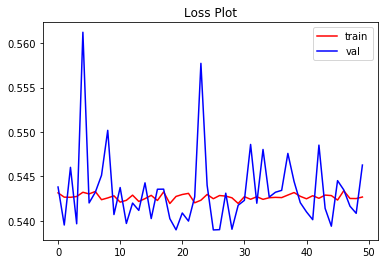

In [371]:
### Plotting the Loss Metric Across Epochs

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'], 'r', label='train')
plt.plot(history.history['val_loss'], 'b' ,label='val')
plt.title("Loss Plot")
plt.legend()


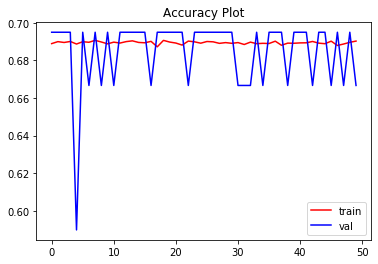

In [372]:
plt.plot(history.history['accuracy'], 'r', label='train')
plt.plot(history.history['val_accuracy'], 'b' ,label='val')
plt.title("Accuracy Plot")
plt.legend()


In [373]:
model.evaluate(X_train9, y_train2)

57988/57988 [==============================] - 1s 18us/step


[0.5467367951003421, 0.6666673421859741]

In [ ]:
'''

Best score: (for 3 target variables)


% 85.75  ( Submitted accuracy: %75.76 )

Epochs 50

model = Sequential()
model.add(Dense(50, activation="sigmoid",input_shape=(X_train9.shape[1],))) 
model.add(Dense(75,activation="sigmoid"))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(3,activation = "sigmoid"))

model.compile(loss="binary_crossentropy", # 'mse' , 'binary_crossentropy' , 'categorical_crossentropy'
              optimizer=keras.optimizers.Adam(learning_rate=0.01), # 'adam' ,  'rmsprop', 'SGD' , ''
              metrics=["accuracy"])  # 'accuracy' , 'mae'  , 'caetogrical_accuracy'
              
              

----------------- Previus best with RELU:

% 83.97

Epochs = 30

model = Sequential()
model.add(Dense(50, activation="relu",input_shape=(X_train9.shape[1],))) 
model.add(Dense(75,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(3,activation = "sigmoid"))

model.compile(loss="binary_crossentropy", # 'mse' , 'binary_crossentropy' , 'categorical_crossentropy'
              optimizer=keras.optimizers.Adam(learning_rate=0.01), # 'adam' ,  'rmsprop', 'SGD' , ''
              metrics=["accuracy"])  # 'accuracy' , 'mae'  , 'caetogrical_accuracy'

'''

In [ ]:
##################### Confirm Accuracy with KFold validation:

In [ ]:
k = 3
num_val_samples = len(X_train9) // k
num_epochs = 50
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = X_train9[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train2[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [X_train9[:i * num_val_samples],
         X_train9[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train2[:i * num_val_samples],
         y_train2[(i + 1) * num_val_samples:]],
        axis=0)

    model = model
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
''' submitted accuracy was the same as for regular fitting/training '''

In [358]:
all_scores

[0.8533982038497925, 0.8520707488059998, 0.8470519185066223]

In [359]:
np.mean(all_scores)

0.8508402903874716

In [ ]:
'''

K Fold (3) : 82.4% 

'''

In [360]:
y_predicted = model.predict(X_test9)

result = pd.DataFrame(y_predicted)

In [361]:
result2 = pd.concat([result,X_test1.ID], axis='columns')
result2.head(10)

,0,1,2,ID
0,0.327280,1.041647e-01,5.750046e-01,10
1,0.924350,2.305862e-02,4.924074e-02,13
2,0.350739,2.071558e-02,6.352367e-01,14
3,1.000000,2.422303e-17,4.184248e-13,29
4,0.263357,1.041769e-01,6.260499e-01,32
5,0.064234,3.159864e-02,9.007385e-01,37
6,0.614682,9.297197e-02,2.701258e-01,47
7,0.417112,2.727961e-02,5.533814e-01,53
8,0.301625,2.254548e-02,6.730281e-01,57
9,0.859380,8.812591e-03,1.451991e-01,58


In [346]:
### SELECT HIGHEST VALUE




In [362]:
result2.to_sql(
    name='watertable_y_test_result_DL', 
    con=sqlcon,
    index=False,
    schema='DRIVENDATA.dbo',
    if_exists='replace' 
)

In [ ]:

######### Submitted Result had: % 74.6